# Exercise 1: Linear Regression

## In this exercise you will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
1. Preprocess the data for linear regression.
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
1. Fit a linear regression model using a single feature.
1. Visualize your results using matplotlib.
1. Perform multivariate linear regression.
1. Perform polynomial regression.
1. Experiment with adaptive learning rates.

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Part 1: Data Preprocessing (10 Points)

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv') # Make sure this cell runs regardless of your absolute path.
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [5]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`).

Implement the cost function `preprocess`.

In [6]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    ###########################################################################
    # TODO: Implement the normalization function.                             #
    ###########################################################################

    x_mean = np.mean(X, axis = 0)
    y_mean = np.mean(y)

    X = (X - x_mean) / (np.max(X, axis = 0) - np.min(X, axis = 0))
    y = (y - y_mean) / (np.max(y) - np.min(y))
   
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return X, y

In [7]:
X, y = preprocess(X, y)

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [8]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

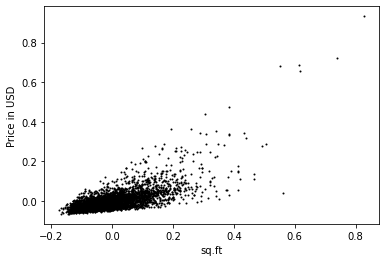

In [9]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

Make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. Hint, recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Add columns of ones as the zeroth column of the features (do this for both the training and validation sets).

In [10]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

# generate vector of 1s the size of training and validation data sets
train_ones = np.ones(X_train.shape)
val_ones = np.ones(X_val.shape) 

# concatenate vector of 1s with exisiting matrix
X_train = np.vstack((train_ones, X_train)).T
X_val = np.vstack((val_ones, X_val)).T

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

## Part 2: Single Variable Linear Regression (40 Points)
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

Implement the cost function `compute_cost`. (10 points)

In [11]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an observation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    ###########################################################################
    # TODO: Implement the MSE cost function.                                  #
    ###########################################################################

    # m is the number of instances (number of rows)
    m = len(X)

    # the hypothesis function can be represented as the dot product between X and theta
    J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return J

In [12]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

Implement the gradient descent function `gradient_descent`. (10 points)

In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################

    m = len(X)
    for itr in range(num_iters):

      # ensure simultaneous update
      theta = theta - (alpha * (1/m) * X.T.dot(X.dot(theta) - y))
      J_iteration = compute_cost(X_train, y_train, theta)
      J_history.append(J_iteration)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

In [14]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help you find problems with your code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

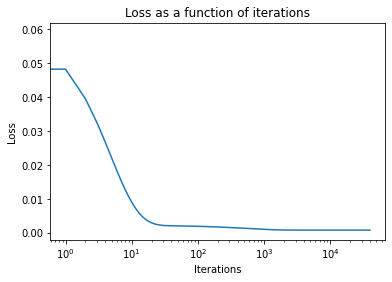

In [15]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

Implement the pseudo-inverse function `pinv`. **Do not use `np.linalg.pinv`**, instead use only direct matrix multiplication as you saw in class (you can calculate the inverse of a matrix using `np.linalg.inv`). (10 points)

In [16]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """
    
    pinv_theta = []
    ###########################################################################
    # TODO: Implement the pseudoinverse algorithm.                            #
    ###########################################################################

    # set gradient equal to 0 yields the necessary conditions for min
    pinv_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pinv_theta

In [17]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

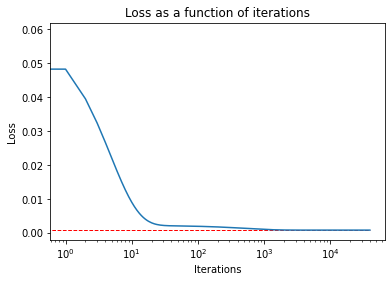

In [18]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r', linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next. Implement the function `efficient_gradient_descent`. (5 points)

In [19]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas

    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################

    threshold = 1e-8
    m = len(X)

    for itr in range(num_iters):
      theta = theta - (alpha * (1/m) * X.T.dot(X.dot(theta) - y))
      J_iteration = compute_cost(X_train, y_train, theta)
      J_history.append(J_iteration)

      # stop if improvement of loss val (from prev to curr) is smaller than thresh
      if itr > 0 and np.abs(J_history[itr - 1] - J_history[itr]) < threshold:
        break

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. Make sure you use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [20]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    num_features = X_train.shape[1]
    for alpha in alphas:
     
      np.random.seed(42)
      initial_theta = np.random.random(size=num_features)
      #theta, J_history = gradient_descent(X_train, y_train, initial_theta, alpha, iterations)
      theta, J_history = efficient_gradient_descent(X_train, y_train, initial_theta, alpha, iterations)

      J_cost = compute_cost(X_val, y_val, theta)
      alpha_dict[alpha] = J_cost

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return alpha_dict

In [21]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)
alpha_dict

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in subtract


{1e-05: 0.03315313543381558,
 3e-05: 0.008192951588224312,
 0.0001: 0.0019911164880719277,
 0.0003: 0.001945555691446853,
 0.001: 0.001367518329440325,
 0.003: 0.0009048133965611657,
 0.01: 0.0007742437200288937,
 0.03: 0.0007340843130279902,
 0.1: 0.0007182981633402744,
 0.3: 0.0007128813949345458,
 1: 0.0007104324065637831,
 2: 0.07132916466326515,
 3: nan}

Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions.

In [22]:
best_alpha = None
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

best_alpha = sorted(alpha_dict, key=alpha_dict.get)[:1][0]

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
print(best_alpha)

1


Pick the best three alpha values you just calculated and provide **one** graph with three lines indicating the training loss as a function of iterations (Use 10,000 iterations). Note you are required to provide general code for this purpose (no hard-coding). Make sure the visualization is clear and informative. (5 points)

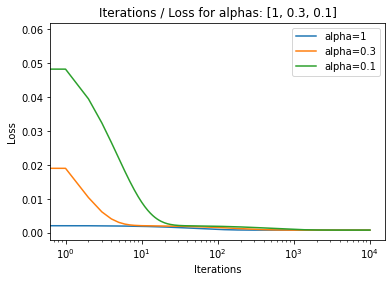

In [23]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
top_three_alphas = sorted(alpha_dict, key=alpha_dict.get)[:3]

def plot_training_loss_per_iterations(alphas, iterations):

  num_alphas = len(alphas)
  for alpha in alphas:
    np.random.seed(42)
    theta = np.random.random(size=2) #ex has 2 features
    theta, J_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
    plt.plot(np.arange(iterations), J_history, label=f"alpha={alpha}")

  plt.xscale('log')
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.title(f"Iterations / Loss for alphas: {alphas}")
  plt.legend()
  plt.show()

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
plot_training_loss_per_iterations(top_three_alphas, 10000)

This is yet another sanity check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

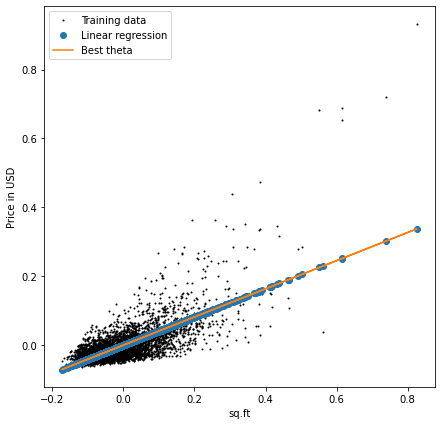

In [24]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Part 2: Multivariate Linear Regression (30 points)

In most cases, you will deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


If you wrote vectorized code, this part should be straightforward. If your code is not vectorized, you should go back and edit your functions such that they support both multivariate and single variable regression. **Your code should not check the dimensionality of the input before running**.

In [25]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [26]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Use the **same** `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [27]:
# preprocessing
X, y = preprocess(X, y)

In [28]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data. Visualizing additional dimensions requires advanced techniques we will learn later in the course.

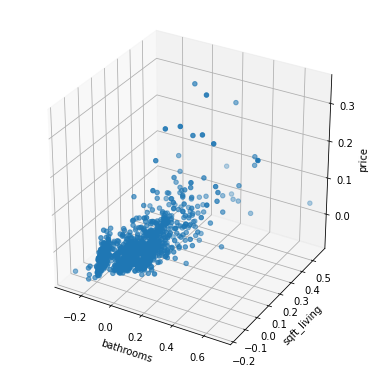

In [29]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Use the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [30]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

# generate vector of 1s the size of training and validation data sets
train_ones = np.ones((X_train.shape[0], 1)) 
val_ones = np.ones((X_val.shape[0], 1)) 

# concatenate vector of 1s with exisiting matrix
X_train = np.hstack((train_ones, X_train))
X_val = np.hstack((val_ones, X_val))

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

Make sure the functions `compute_cost` (10 points), `gradient_descent` (15 points), and `pinv` (5 points) work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the single variable regression model. 

In [31]:
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [32]:
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

In [33]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

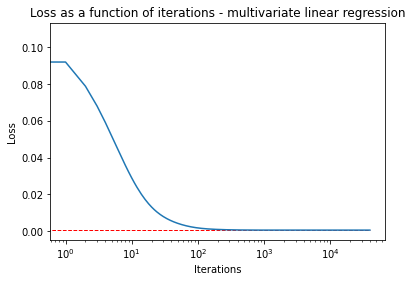

In [34]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r', linewidth = 1, linestyle = 'dashed')
plt.show()

## Part 3: Polynomial Regression (10 points)

Linear Regression allows us to explore linear relationships but if we need a model that describes non-linear dependencies we can also use Polynomial Regression. In order to perform polynomial regression, we create additional features using a function of the original features and use standard linear regression on the new features. For example, consider the following single variable $(x)$ cubic regression:

$$ x_0 = 1, \space x_1 = x, \space x_2 = x^2, \space x_3 = x^3$$

And after using standard linear regression:

$$ f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3$$

As required. 

For this exercise, use polynomial regression by using all **quadratic** feature combinations: 

$$ 1, x, y, z, x^2, y^2, z^2, xy, xz, yz, ...$$

and evaluate the MSE cost on the training and testing datasets.

In [35]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
# want to iterate through the DF and add columns for each quadratic feature combination
# and then, run that through the gradient descent

# new dataframe for augmented features
df_new_features = all_features

# copying all features
df_all_features = all_features

# currently 20 features
num_of_features = len(all_features.columns)

# load features into a list
features = list(all_features.columns)

features_combinations = []

# iterate through the features and find new combinations
for f1 in features:
  # handle the x**2, ... cases
  new_combination = (f1, f1)
  if new_combination not in features_combinations:
    features_combinations.append(new_combination)

  for f2 in features:
    # handle the x*y,... cases
    new_combination = (f1, f2)
    reverse_combination = (f2, f1)
    if new_combination not in features_combinations and reverse_combination not in features_combinations:
      features_combinations.append(new_combination)

# for every new combo to create
for new_f in features_combinations:
  f1 = new_f[0]
  f2 = new_f[1]

  if f1 == f2:
    new_col_name = f'{f1}^2'
    df_new_features[new_col_name] = df_all_features[f1]** 2 
  else:
    new_col_name = f'{f1}*{f2}'
    df_new_features[new_col_name] = df_all_features[f1]*df_all_features[f2] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [37]:
df_new_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat^2,lat*long,lat*sqft_living15,lat*sqft_lot15,long^2,long*sqft_living15,long*sqft_lot15,sqft_living15^2,sqft_living15*sqft_lot15,sqft_lot15^2
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,2257.314125,-5808.576778,63665.008,268438.2800,14946.774049,-163824.38,-690752.050,1795600,7571000,31922500
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,2277.293841,-5837.184999,80648.490,364540.7190,14961.937761,-206719.11,-934394.841,2856100,12909910,58354321
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,2278.907096,-5835.146731,129847.088,384862.9498,14940.906289,-332473.76,-985442.446,7398400,21928640,64995844
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,2258.226433,-5816.213274,64628.288,237604.0000,14980.046449,-166454.48,-611965.000,1849600,6800000,25000000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,2267.359642,-5811.392356,85710.240,357268.8504,14894.982025,-219681.00,-915703.635,3240000,13505400,56295009


In [38]:
X = df_new_features.values
y = df['price'].values

# preprocessing
X, y = preprocess(X, y)

# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [39]:
# bias trick
np_ones_train = np.ones(X_train.shape[0])
np_ones_val = np.ones(X_val.shape[0])
X_train = np.c_[np_ones_train, X_train]
X_val = np.c_[np_ones_val, X_val]

shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

theta_pinv = np.linalg.pinv(X_train).dot(y_train) 
J_pinv = compute_cost(X_train, y_train, theta_pinv)

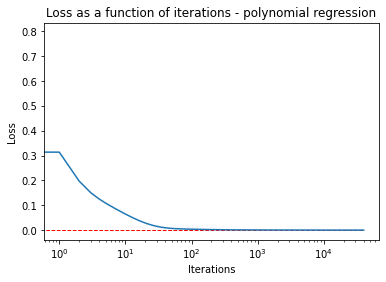

In [40]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - polynomial regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r', linewidth = 1, linestyle = 'dashed')
plt.show()

Give an explanation to the results and compare them to regular linear regression. Do they make sense?

In part 2, we used multivariate linear regression model which made up of multiple linear regression models. Instead of using a single feature, we used multiple features (or rather, a multi dimensional dataset of features) to minimize the cost function.  We found that using an alpha of 1 (determined to be the best alpha with gradient descent), it takes about 500 iterations for the convergence to optimal minimum to happen. 

In this part, we used polynomial regression where additional features are created as a function of the original features and all of those augmented features are used to minimize the cost function. When using the same alpha of 1, it takes about 100 iterations for the gradient descent to find the optimal minimum. 

Comparing the multivariate linear regression (with 20 features) with the polynomial regression (with 170 features) in the context of this model, we find that using polynomial regression reduced the number of iterations needed. 

In general, when more features are included, there will be more theta coefficients. This increases the degrees of freedom in the model, which makes the model more prone to overfitting. Due to this, the model minimizes the loss function in less iterations. 

## Part 4: Adaptive Learning Rate (10 points)

So far, we kept the learning rate alpha constant during training. However, changing alpha during training might improve convergence in terms of the global minimum found and running time. Implement the adaptive learning rate method based on the gradient descent algorithm above. 

**Your task is to find proper hyper-parameter values for the adaptive technique and compare this technique to the constant learning rate. Use clear visualizations of the validation loss and the learning rate as a function of the iteration**. 

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

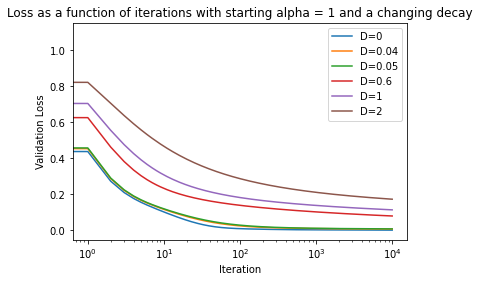

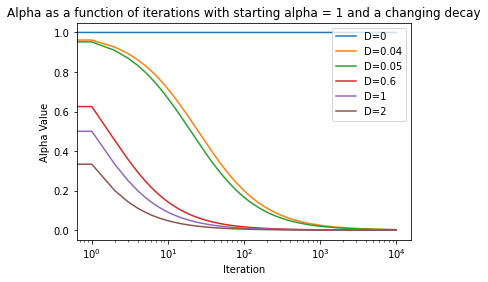

In [41]:
### Your code here ###

def gradient_descent_adaptive(X_train, X_val, y_train, y_val, theta, alpha_0, num_iters, decay):
    J_history = [] 
    learn_rate = []
    theta = theta.copy() 
    m = len(X)
    for itr in range(num_iters):
      alpha = alpha_0/(1+(decay*itr))
      theta = theta - (alpha * (1/m) * X_train.T.dot(X_train.dot(theta) - y_train))
      J_iteration = compute_cost(X_val, y_val, theta)
      J_history.append(J_iteration)
      learn_rate.append(alpha)
    return learn_rate, theta, J_history

iterations = 10000
decay_arr = [0, 0.04, 0.05, 0.6, 1, 2]
decays_history = [] 
learn_rate_history = []
for D in decay_arr:
  np.random.seed(42)
  theta = np.random.random(size=171)
  learn_rate ,_, J_history = gradient_descent_adaptive(X_train, X_val, y_train, y_val, theta, best_alpha, iterations, D)
  decays_history.append(J_history)
  learn_rate_history.append(learn_rate)

#iteration / loss graph
for x in range(len(decay_arr)):
  plt.plot(np.arange(iterations), decays_history[x], label = f"D={decay_arr[x]}")
plt.xscale('log')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title(f'Loss as a function of iterations with starting alpha = {best_alpha} and a changing decay')
plt.legend(loc="upper right")
plt.show()

#iteration / alpha graph
for x in range(len(decay_arr)):
  plt.plot(np.arange(iterations), learn_rate_history[x], label = f"D={decay_arr[x]}")
plt.xscale('log')
plt.xlabel('Iteration')
plt.ylabel('Alpha Value')
plt.title(f'Alpha as a function of iterations with starting alpha = {best_alpha} and a changing decay')
plt.legend(loc="upper right")
plt.show()
